# Breast cancer dataset

In this markdown we will use different classification technologies to 
determine which performs well with the dataset provided. Namely
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machines

We will also try some standard data processing methods to see how it
influences the results. Specifically
- Removing highly correlated variables
- Missing data

To evaluate the results we will use the F1-score. This score takes
recall and precision into consideration and gives us a much better
look at the results, rather than just accuracy.

# 3.2 Data

The data was downloaded from http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  

The column we will will predict is **diagnosis**. The values in this field are **M** for malignant, and **B** for benign.  Using the other variables we will try to predict whether a tumor malignant or benign.

We will assign the **diagnosis** column to  **Y**  and the remaining variables as **X**.

In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('breast_cancer_data.csv')
df = df.drop('Unnamed: 32', axis = 1)
df = df.drop('id', axis = 1)

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Convert label M to 1 and B to 0.
- Drop the diagnosis column from the dataframe


In [13]:
labels = df['diagnosis']
Y = [1 if ele == "M" else 0 for ele in labels] 
df = df.drop('diagnosis', axis=1)

We are interested only in the columns with the suffix _mean for our analysis

In [14]:
cols = [c for c in df.columns if c.endswith('mean')]
X = df[cols]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## 3.3.1 Splitting data for training and testing

We will use the *train_test_split* function to split our dataset.
The *test_size* parameter tells the method to keep 80% training and 20% testing.
The *stratify* parameter tells the method to keep the same propportion of success and failures in the different sets. However in our case we want the new data to represent as closely as possible to real data so we don't want to assume that the data will be in the same proportion. In this book we set the stratify parameter to None.

Cross validation is a common method to make sure that all data points have an opportunity to be part of the test and the training dataset. If we were to use a 10x cross validation we would get 10 different F-scores. In this case, we use 100-fold cross-validation and get a list of F-scores. From the distribution we will take the 5th and 95th highest value which provide a 90% confidence interval.

We consider two different scores: training score and testing score. The training score is simply predicting the diagnoses (malignant or benign) based on the same dataset that we built the prediction. This often gives us the best possible performance for our model. The testing score is based on the predictions using the test set. This is the more meaningful comparison because we are designing our model to work for new data. Because the test data is invisible when the model is built, the test data is a good representative of new data. For that reason, we recommend that you report only the test scores.



In [15]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=None)

## 3.4.1 Logistic Regression

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
def logreg(X_train, X_test, Y_train, Y_test):
    clf = LogisticRegression(random_state=123).fit(X_train, Y_train)
    Y_train_predicted = clf.predict(X_train)
    train_score = f1_score(Y_train, Y_train_predicted)
    Y_test_predicted = clf.predict(X_test)
    test_score = f1_score(Y_test, Y_test_predicted)
    return [train_score, test_score]

In [33]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=None, random_state=i)
    score[i,]=(logreg(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("train test")
print("5%", score_sorted[5])
print("95%", score_sorted[95])
#5% [0.86227545 0.81578947]
#95% [0.89308176 0.9382716 ]

train test
5% [0.86227545 0.81578947]
95% [0.89308176 0.9382716 ]


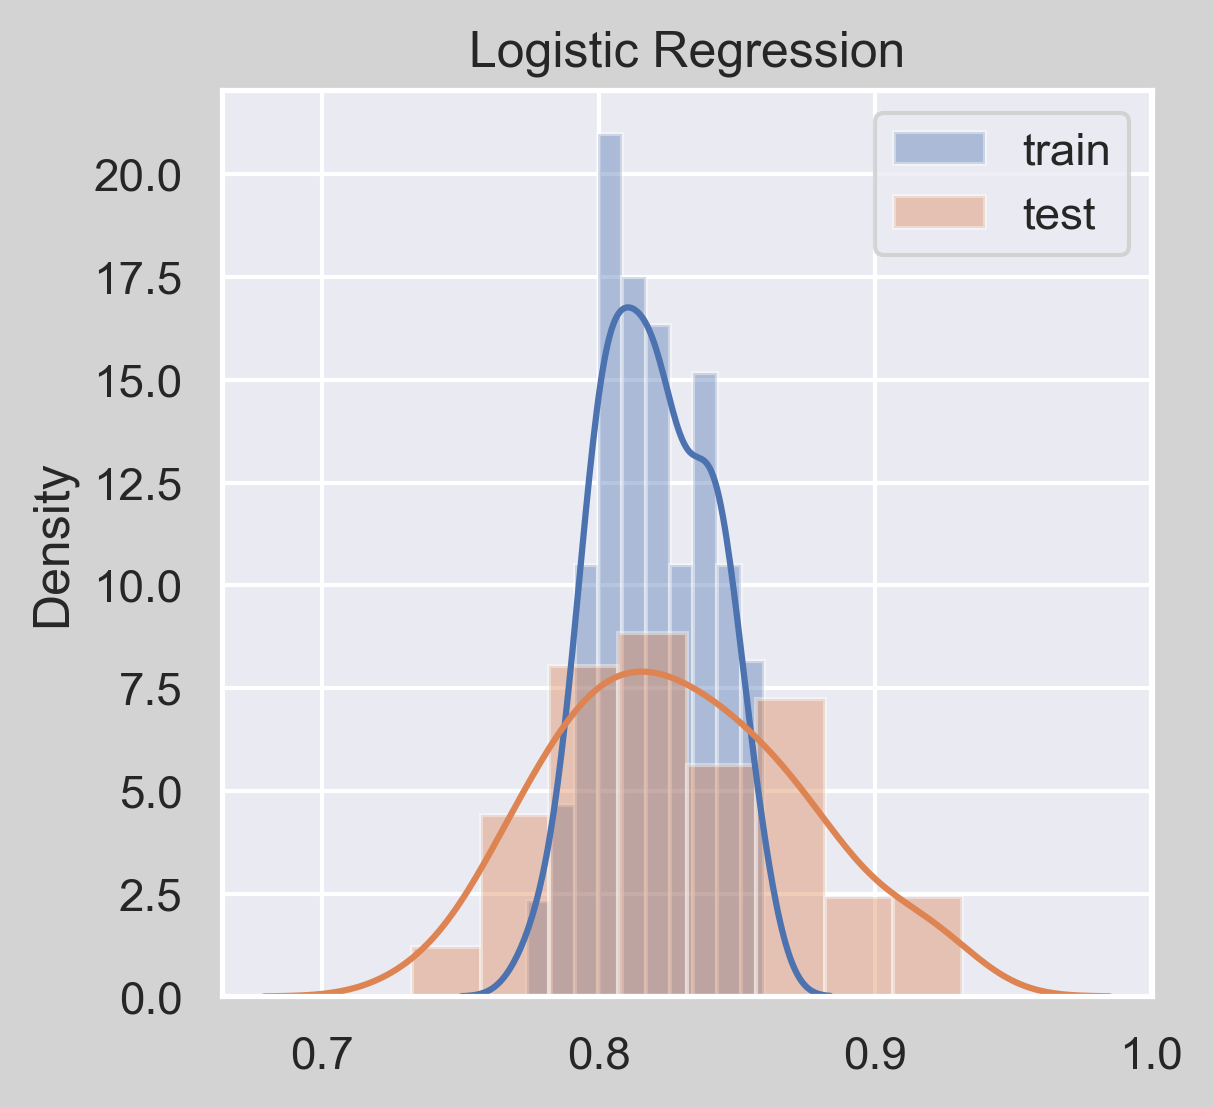

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

histfig, axes = plt.subplots(nrows = 1,ncols = 1,
                         figsize = (4,4), dpi=300, 
                         facecolor="lightgrey"
                        )
sns.set(font_scale=1)
sns.distplot(score[:,0], label="train", bins=10)
sns.distplot(score[:,1], label="test")
plt.legend()
plt.title("Logistic Regression")
histfig.savefig('trainingtestingdist.png')


## 3.4.2 Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

def decisiontree(X_train, X_test, Y_train, Y_test):
    clf = DecisionTreeClassifier(criterion="gini", random_state=123).fit(X_train, Y_train)
    Y_train_predicted = clf.predict(X_train)
    train_score = f1_score(Y_train, Y_train_predicted)
    Y_test_predicted = clf.predict(X_test)
    test_score = f1_score(Y_test, Y_test_predicted)
    return [train_score, test_score]

In [35]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=None, random_state=i)
    score[i,]=(decisiontree(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.83544304]
95% [1.         0.94252874]


Text(0.5, 1.0, 'Decision Trees')

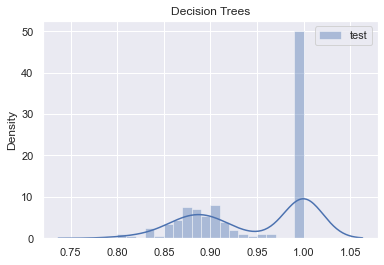

In [36]:
sns.set(font_scale=1)
#sns.distplot(train_score, label="train")
#sns.distplot(test_score, label="test")
sns.distplot(score_sorted, label="test", bins=20)
plt.legend()
plt.title("Decision Trees")

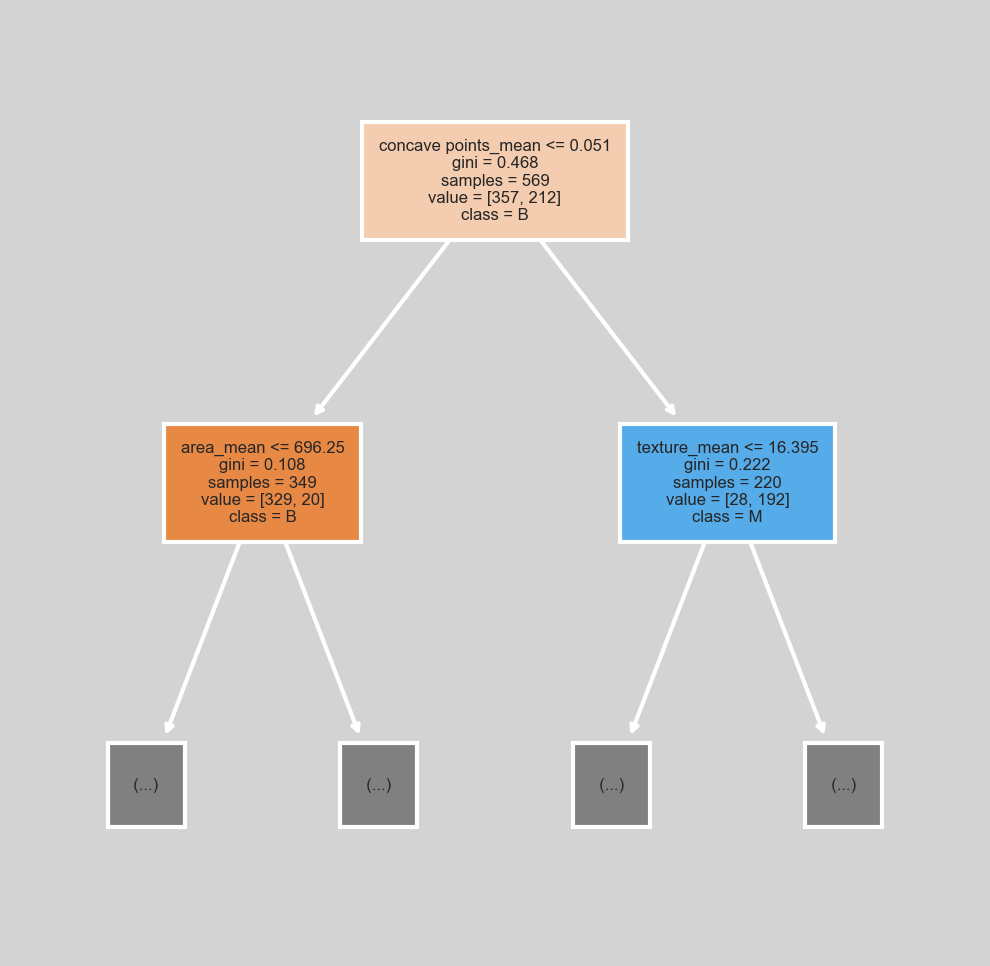

In [37]:
from sklearn import tree
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=123).fit(X, Y)
fig, axes = plt.subplots(nrows = 1,ncols = 1,
                         figsize = (4,4), dpi=300, 
                         facecolor="lightgrey"
                        )
tree.plot_tree(clf_gini,
               max_depth=1,
               feature_names = X.columns,
               class_names= ["B","M"],
               filled = True,
              fontsize=4,
              )
fig.savefig('decision_tree.png')


## 3.4.3 Random Forest Classifier 

In [38]:
from sklearn.ensemble import RandomForestClassifier

def randomforest(X_train, X_test, Y_train, Y_test):
    clf = RandomForestClassifier(random_state=123).fit(X_train, Y_train)
    Y_train_predicted = clf.predict(X_train)
    train_score = f1_score(Y_train, Y_train_predicted)
    Y_test_predicted = clf.predict(X_test)
    test_score = f1_score(Y_test, Y_test_predicted)
    return [train_score, test_score]

In [39]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=None, random_state=i)
    score[i,]=(randomforest(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.87640449]
95% [1.         0.96103896]


Text(0.5, 1.0, 'Random Forest')

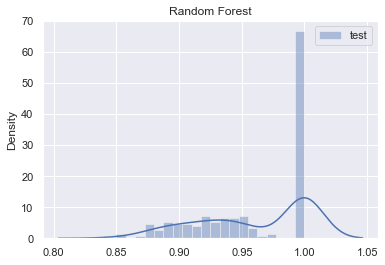

In [40]:
sns.set(font_scale=1)
sns.distplot(score_sorted, label="test", bins=20)
plt.legend()
plt.title("Random Forest")

## 3.4.4 SVM

In [49]:
from sklearn import svm

def mysvm(X_train, X_test, Y_train, Y_test):
    clf = svm.SVC(random_state=123).fit(X_train, Y_train)
    Y_train_predicted = clf.predict(X_train)
    train_score = f1_score(Y_train, Y_train_predicted)
    Y_test_predicted = clf.predict(X_test)
    test_score = f1_score(Y_test, Y_test_predicted)
    return [train_score, test_score]

In [50]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=None, random_state=i)
    score[i,]=(mysvm(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.78947368 0.76470588]
95% [0.8525641  0.91666667]


Text(0.5, 1.0, 'SVM')

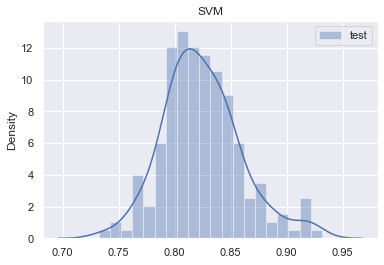

In [51]:
sns.set(font_scale=1)
sns.distplot(score_sorted, label="test", bins=20)
plt.legend()
plt.title("SVM")

## 3.4.5 Removing highly correlated variables

The best scenario is to get the best possible results with the fewest number of variables. Variables that are highly correlated with each other are redundant and do not provide any additional information. In some cases the extra variables may cause certain algorithms to fail. Here we remove all variables that are more than 90% identical and repeat all the models as shown above.  

<AxesSubplot:>

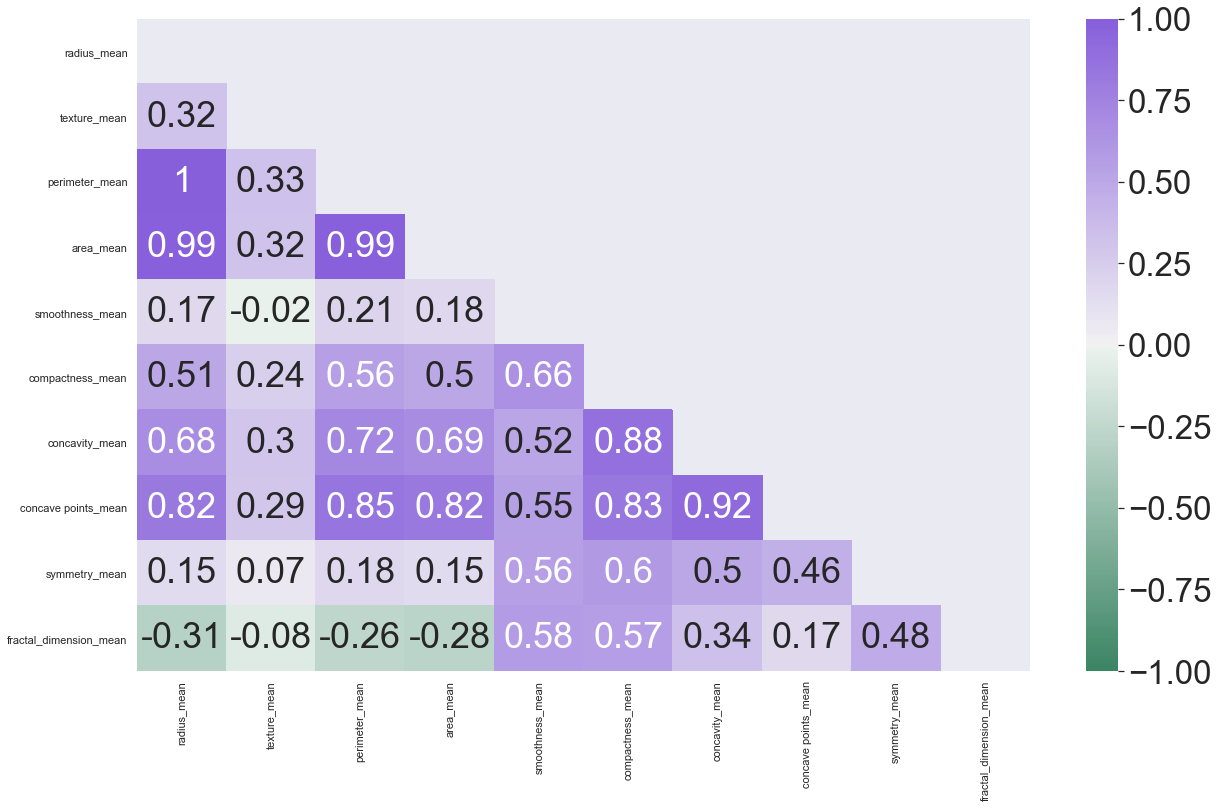

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X.corr().round(2)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20,12))
sns.set(font_scale=3)
cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(corr_matrix, mask = mask, annot=True, 
            cmap= cmap, vmin=-1, vmax=1)

In [59]:
X_select = X.copy()
X_select = X_select.drop(['perimeter_mean','area_mean','concavity_mean'], axis = 1)

<AxesSubplot:>

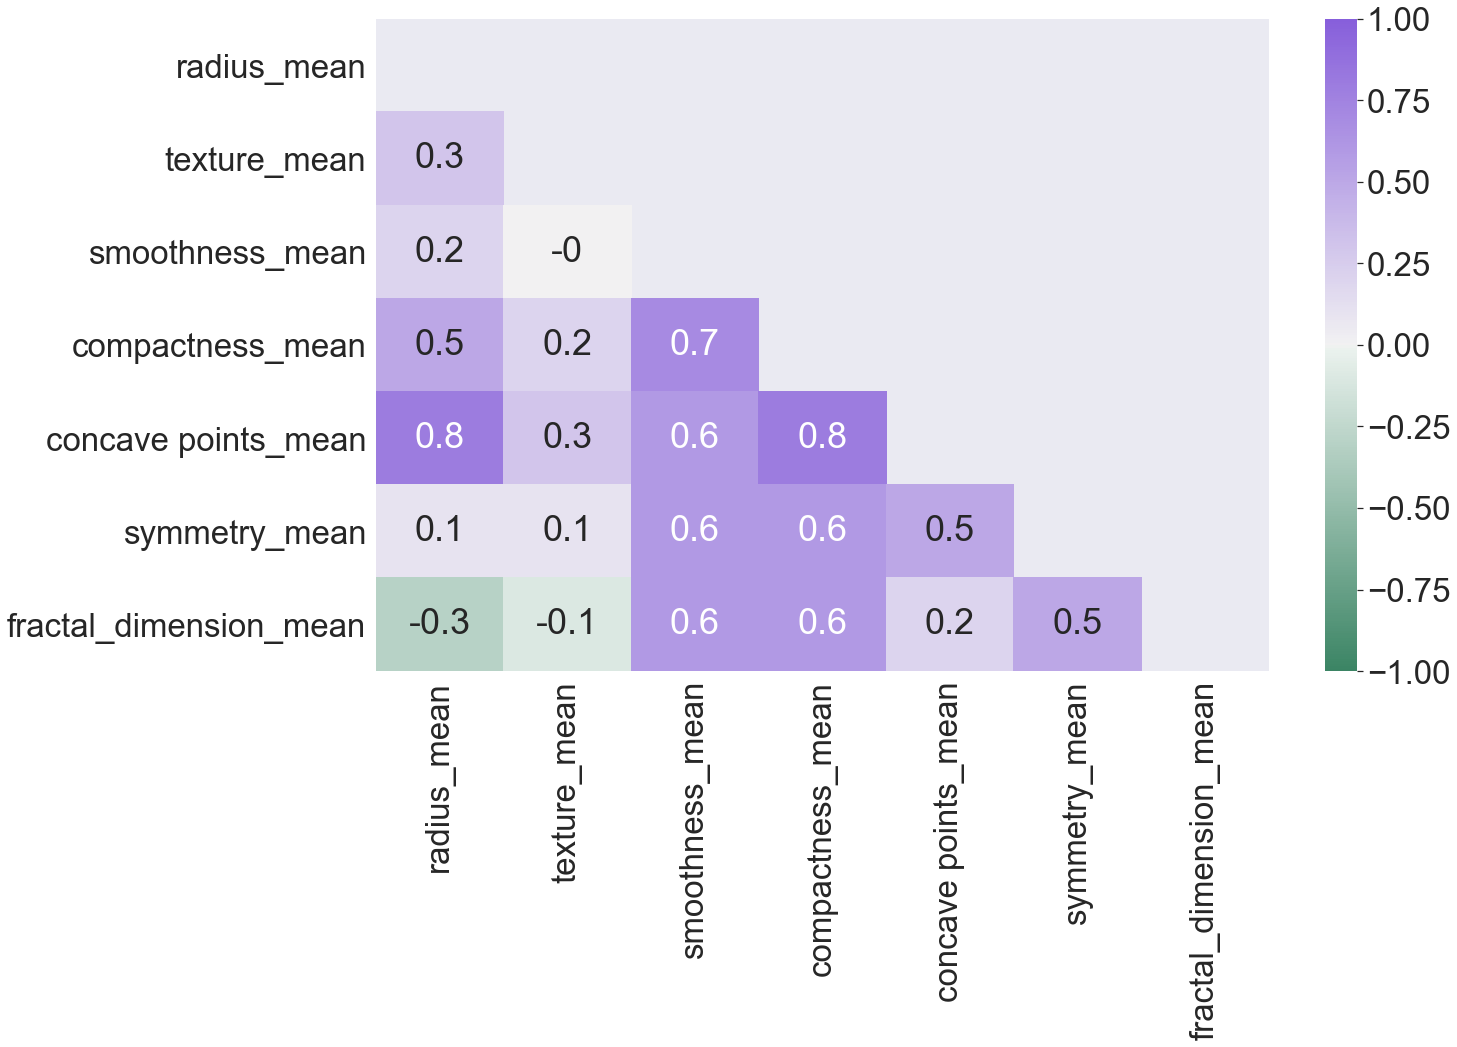

In [60]:
corr_matrix = X_select.corr().round(1)
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20,12))
sns.set(font_scale=3)
cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap= cmap, vmin=-1, vmax=1)

### Logistic Regression

In [61]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=i)
    score[i,]=(logreg(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.83890578 0.79518072]
95% [0.87164179 0.92307692]


### Decision Tree

In [62]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=i)
    score[i,]=(decisiontree(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.    0.825]
95% [1.         0.93069307]


### Random Forest

In [63]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=i)
    score[i,]=(randomforest(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.86075949]
95% [1.         0.96202532]


### SVM

In [64]:
score=np.zeros(shape=(100,2))
for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=i)
    score[i,]=(mysvm(X_train, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.82622951 0.79518072]
95% [0.8681672  0.92631579]


# 3.5 Missing data

On accassion, data can missing for certain variables. There are several ways of dealing with this problem, but here we will discuss two main ones:
+ remove the rows with missing data
+ impute the value using the median value of the variable.

We  repeat the different predictive methods to see which method can deal with missing data the best. Here we will randomly remove 35% of the data. Some observations will have more missing data than others.

The results below are summarized in Table 3.4

In [65]:
import random
random.seed(123)
def get_data_with_missing_values(data, portion_to_remove):
    data_copy = data.copy()
    ix = [(row, col) for row in range(data_copy.shape[0]) 
          for col in range(data_copy.shape[1])]
    for row, col in random.sample(ix, 
                                  int(round(portion_to_remove*len(ix)))):
        data_copy.iat[row, col] = np.nan
    return data_copy

In [66]:
X_missing = get_data_with_missing_values(X_select, 0.35)

In [67]:
X_missing.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,NaN,0.1184,NaN,0.1471,0.2419,NaN
1,20.57,17.77,NaN,0.07864,NaN,0.1812,NaN
2,19.69,NaN,0.1096,NaN,0.1279,0.2069,0.05999
3,NaN,20.38,NaN,NaN,0.1052,0.2597,NaN
4,20.29,14.34,0.1003,0.13280,0.1043,0.1809,0.05883


## Remove rows with missing values

In [68]:
def remove_missing_data_row(data):
    df = data.copy()
    df = df.dropna()
    return df

Logistic Regression

In [69]:
score=np.zeros(shape=(100,2))
random.seed(123)

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=i)
    X_missing = get_data_with_missing_values(X_train, 0.35)
    X_missing['diagnosis']=Y_train
    removed_data = remove_missing_data_row(X_missing)
    Y_missing_removed = removed_data['diagnosis']
    X_missing_removed = removed_data.drop("diagnosis", axis=1)
    score[i,]=(logreg(X_missing_removed, X_test, Y_missing_removed, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.71428571 0.73417722]
95% [1.        0.9047619]


In [70]:
score=np.zeros(shape=(100,2))
random.seed(123)

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=i)
    X_missing = get_data_with_missing_values(X_train, 0.35)
    X_missing['diagnosis']=Y_train
    removed_data = remove_missing_data_row(X_missing)
    Y_missing_removed = removed_data['diagnosis']
    X_missing_removed = removed_data.drop("diagnosis", axis=1)
    score[i,]=(decisiontree(X_missing_removed, X_test, Y_missing_removed, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95]) 

5% [1.         0.66666667]
95% [1.         0.91666667]


In [71]:
score=np.zeros(shape=(100,2))
random.seed(123)

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=i)
    X_missing = get_data_with_missing_values(X_train, 0.35)
    X_missing['diagnosis']=Y_train
    removed_data = remove_missing_data_row(X_missing)
    Y_missing_removed = removed_data['diagnosis']
    X_missing_removed = removed_data.drop("diagnosis", axis=1)
    score[i,]=(randomforest(X_missing_removed, X_test, Y_missing_removed, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.78571429]
95% [1.         0.93023256]


In [72]:
score=np.zeros(shape=(100,2))
random.seed(123)

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=i)
    X_missing = get_data_with_missing_values(X_train, 0.35)
    X_missing['diagnosis']=Y_train
    removed_data = remove_missing_data_row(X_missing)
    Y_missing_removed = removed_data['diagnosis']
    X_missing_removed = removed_data.drop("diagnosis", axis=1)
    score[i,]=(mysvm(X_missing_removed, X_test, Y_missing_removed, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0. 0.]
95% [0.95652174 0.84090909]


## Imputing values

In [73]:
def impute_missing_data(data):
    data.fillna(data.median(axis=0), inplace=True)
    return data

In [74]:
X_missing.median()

radius_mean               13.59000
texture_mean              18.90000
smoothness_mean            0.09579
compactness_mean           0.09263
concave points_mean        0.03390
symmetry_mean              0.17775
fractal_dimension_mean     0.06128
diagnosis                  0.00000
dtype: float64

In [75]:
X_imputed = impute_missing_data(X_missing)
X_imputed.sort_index(inplace=True)
X_imputed.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,18.90,0.11840,0.27760,0.14710,0.24190,0.07871,1
1,13.59,17.77,0.08474,0.07864,0.03390,0.18120,0.06128,1
4,20.29,14.34,0.10030,0.09263,0.10430,0.18090,0.05883,1
5,12.45,18.90,0.12780,0.17000,0.03390,0.17775,0.06128,1
7,13.59,20.83,0.11890,0.09263,0.05985,0.21960,0.07451,1


In [77]:
score=np.zeros(shape=(100,2))
random.seed(123)

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=i)
    X_missing = get_data_with_missing_values(X_train, 0.35)
    X_missing_imputed = impute_missing_data(X_missing)
    score[i,]=(logreg(X_missing_imputed, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.66903915 0.79487179]
95% [0.74121406 0.91566265]


In [78]:
score=np.zeros(shape=(100,2))
random.seed(123)

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=1)
    X_missing = get_data_with_missing_values(X_train, 0.35)
    X_missing_imputed = impute_missing_data(X_missing)
    score[i,]=(decisiontree(X_missing_imputed, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.70588235]
95% [1.         0.86486486]


In [79]:
score=np.zeros(shape=(100,2))
random.seed(123)

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=1)
    X_missing = get_data_with_missing_values(X_train, 0.35)
    X_missing_imputed = impute_missing_data(X_missing)
    score[i,]=(randomforest(X_missing_imputed, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [1.         0.86419753]
95% [1.    0.925]


In [80]:
score=np.zeros(shape=(100,2))
random.seed(123)

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X_select, Y, test_size = 0.2, stratify=None, random_state=1)
    X_missing = get_data_with_missing_values(X_train, 0.35)
    X_missing_imputed = impute_missing_data(X_missing)
    score[i,]=(mysvm(X_missing_imputed, X_test, Y_train, Y_test))

score_sorted = np.sort(score, axis=0)

print("5%", score_sorted[5])
print("95%", score_sorted[95])

5% [0.62015504 0.73239437]
95% [0.71480144 0.77922078]


# 3.6 Important variables


In [101]:
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier(random_state=123).fit(X_train, Y_train)
result = permutation_importance(clf, X_train, Y_train, n_repeats=50, scoring='f1')


In [102]:
clf.feature_importances_

array([0.32787674, 0.11171914, 0.06002722, 0.13822796, 0.28625046,
       0.03313446, 0.04276402])

In [103]:
result.importances
feature_imp_data = {'features':X_train.columns,
                 'mean':result.importances_mean,
                 'sd':result.importances_std}
feature_imp_df = pd.DataFrame(data=feature_imp_data)

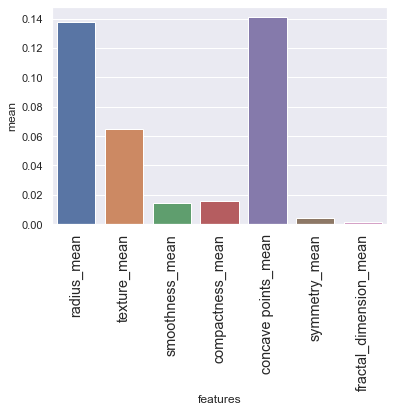

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1)

feature_plot = sns.barplot(x='features',y='mean',data=feature_imp_df)
feature_plot.set_xticklabels(feature_imp_df['features'],rotation=90, fontsize="large")
plt.savefig("important_variable.png")